<a href="https://colab.research.google.com/github/JacovkaMana/hacaton/blob/main/Protasov_L7_unfinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade xlrd

In [ ]:
#%pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mpl_dates

import pandas as pd 
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

Считывание и переименовывание данных

In [ ]:
dates = ['Время движения час:мин:сек','Время работы двигателя, час:мин:сек','Время работы двигателя в движении, час:мин:сек','Время работы двигателя без движения, час:мин:сек','Время работы двигателя на холостом ходу, час:мин:сек','Время работы двигателя на нормальных оборотах, час:мин:сек','Время работы двигателя на предельных оборотах, час:мин:сек','Время с выключенным двигателем, час:мин:сек','Время работы двигателя под нагрузкой, час:мин:сек']
columns1 = ['id','Date','Mileage','Moving','Enabled','ME', 'nME','HEnabled', 'NEnabled', 'PEnabled','Off','Load','V1','V2']
columns2 = ['Name', 'id']
dateparse = lambda x: datetime.strptime(x, '%H:%M:%S')
dfirst = pd.read_excel('L7 Home Senior-1-1.xls', parse_dates=dates, date_parser=dateparse)
#dfirst = pd.read_excel('L7 Home Senior-1-1.xls', index_col=0)
dsecond = pd.read_excel('L7 Home Senior-1-2.xls')
dfirst.columns = columns1
dsecond.columns = columns2


In [ ]:
print(dfirst.info(verbose=True))
print(dfirst['Enabled'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1302 non-null   int64         
 1   Date      1302 non-null   object        
 2   Mileage   1302 non-null   float64       
 3   Moving    1302 non-null   datetime64[ns]
 4   Enabled   1258 non-null   datetime64[ns]
 5   ME        1302 non-null   datetime64[ns]
 6   nME       1302 non-null   datetime64[ns]
 7   HEnabled  1302 non-null   datetime64[ns]
 8   NEnabled  1296 non-null   datetime64[ns]
 9   PEnabled  1302 non-null   datetime64[ns]
 10  Off       456 non-null    datetime64[ns]
 11  Load      1282 non-null   datetime64[ns]
 12  V1        31 non-null     float64       
 13  V2        31 non-null     float64       
dtypes: datetime64[ns](9), float64(3), int64(1), object(1)
memory usage: 142.5+ KB
None
0      1900-01-01 01:08:11
1      1900-01-01 05:49:34
2      1900-01-

In [ ]:
from datetime import datetime, time, timedelta
from random import randint

def sum_time(time1, time2):
    th1, tm1, ts1 = time1.hour, time1.minute, time1.second
    th2, tm2, ts2 = time2.hour, time2.minute, time2.second

    th3, tm3, ts3 = th1 + th2, tm1 + tm2, ts1 + ts2
    tm3, ts3 = tm3 + ts3 // 60, ts3 % 60
    th3, tm3 = th3 + tm3 // 60, tm3 % 60

    # На всякий случай. Вдруг больше дня получится =)
    th3 = th3 % 24

    return time(th3, tm3, ts3)

def minus_time(time1, time2, time3):
    th1, tm1, ts1 = time1.hour, time1.minute, time1.second
    th2, tm2, ts2 = time2.hour, time2.minute, time2.second
    th3, tm3, ts3 = time3.hour, time3.minute, time3.second

    th3, tm3, ts3 = th1 - th2 - th3, tm1 - tm2 - tm3, ts1 - ts2 - ts3
    tm3, ts3 = tm3 + ts3 // 60, ts3 % 60
    th3, tm3 = th3 + tm3 // 60, tm3 % 60

    # На всякий случай. Вдруг больше дня получится =)
    th3 = th3 % 24

    return time(th3, tm3, ts3)


def back_time(time1):
    th1, tm1, ts1 = time1.hour, time1.minute, time1.second
    return time(th1, tm1, ts1)

def rnd_time():
    th1 = randint(0,23)
    tm1 = randint(0,59)
    ts1 = randint(0,59)

    return time(th1, tm1, ts1)
    

In [ ]:
i = 0
for index, row in dfirst.iterrows():
  if pd.isnull(row[4]):
    row[4] = sum_time(row[5],row[6])
  else:
    row[4] = back_time(row[4])

  if pd.isnull(row[8]):
    row[8] = minus_time(row[4], row[7], row[9])
  else:
    row[8] = back_time(row[8])

  if pd.isnull(row[11]):
    row[11] = sum_time(row[8], row[9])
  else:
    row[11] = back_time(row[11])

  if pd.isnull(row[10]):
    row[10] = rnd_time()
  else:
    row[10] = back_time(row[10])
    

  dfirst.at[i, 'Enabled'] = row[4]
  dfirst.at[i, 'NEnabled'] = row[8]
  dfirst.at[i, 'Load'] = row[11]
  dfirst.at[i, 'Off'] = row[10]

  dfirst.at[i,'Moving'] = back_time(row[3])
  dfirst.at[i,'ME'] = back_time(row[5])
  dfirst.at[i,'nME'] = back_time(row[6])
  dfirst.at[i,'HEnabled'] = back_time(row[7])
  dfirst.at[i,'PEnabled'] = back_time(row[9])
  i += 1




In [ ]:
print(dfirst.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1302 non-null   int64  
 1   Date      1302 non-null   object 
 2   Mileage   1302 non-null   float64
 3   Moving    1302 non-null   object 
 4   Enabled   1302 non-null   object 
 5   ME        1302 non-null   object 
 6   nME       1302 non-null   object 
 7   HEnabled  1302 non-null   object 
 8   NEnabled  1302 non-null   object 
 9   PEnabled  1302 non-null   object 
 10  Off       1302 non-null   object 
 11  Load      1302 non-null   object 
 12  V1        31 non-null     float64
 13  V2        31 non-null     float64
dtypes: float64(3), int64(1), object(10)
memory usage: 142.5+ KB
None


In [ ]:
def total_time(time1):
    th1, tm1, ts1 = time1.hour, time1.minute, time1.second
    total = th1 * 60 * 60 + tm1 * 60 + ts1
    return total

for column in dfirst:
  clk = dfirst.loc[0,column]
  if type(clk) is time:
    dfirst[column] = dfirst[column].apply(lambda x: total_time(x))
    print(total_time(clk))

297
4091
297
3794
711
3380
0
82309
3380


In [ ]:
dcheck = dfirst.dropna()
print(dcheck)

     id        Date  Mileage  Moving  Enabled    ME    nME  HEnabled  \
0   734  01.12.2021     1.21     297     4091   297   3794       711   
1   734  02.12.2021     1.04     207    20974   206  20768     20821   
2   734  03.12.2021     1.72     252    10918   252  10666      9440   
3   734  04.12.2021     0.43     629    25283   629  24654     25097   
4   734  05.12.2021     1.23     314     9202   302   8900      8992   
5   734  06.12.2021     0.69     264    23162   264  22898     22637   
6   734  07.12.2021     3.05     327    21949   325  21624     21575   
7   734  08.12.2021    11.56    1799    32790  1799  30991     26310   
8   734  09.12.2021     0.69     312    31940   312  31628     30277   
9   734  10.12.2021     3.01       0      361     0    361       361   
10  734  11.12.2021     2.18     253    10284   253  10031     10155   
11  734  12.12.2021     1.45     531     4326   531   3795      3913   
12  734  13.12.2021     0.30     150      180   150     30      

In [ ]:
dcheck['diff'] = dcheck['V1'] - dcheck['V2']
dcheck['V1'].replace(0, np.nan, inplace=True)
dcheck = dcheck.dropna()
dcheck.drop(dcheck[dcheck.V2 > dcheck.V1].index, inplace=True)
dcheck = dcheck.drop(['Date'], axis=1)

In [ ]:
print(dcheck.info())
print(dcheck)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        24 non-null     int64  
 1   Mileage   24 non-null     float64
 2   Moving    24 non-null     int64  
 3   Enabled   24 non-null     int64  
 4   ME        24 non-null     int64  
 5   nME       24 non-null     int64  
 6   HEnabled  24 non-null     int64  
 7   NEnabled  24 non-null     int64  
 8   PEnabled  24 non-null     int64  
 9   Off       24 non-null     int64  
 10  Load      24 non-null     int64  
 11  V1        24 non-null     float64
 12  V2        24 non-null     float64
 13  diff      24 non-null     float64
dtypes: float64(4), int64(10)
memory usage: 2.8 KB
None
     id  Mileage  Moving  Enabled    ME    nME  HEnabled  NEnabled  PEnabled  \
0   734     1.21     297     4091   297   3794       711      3380         0   
1   734     1.04     207    20974   206  20768     20821 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

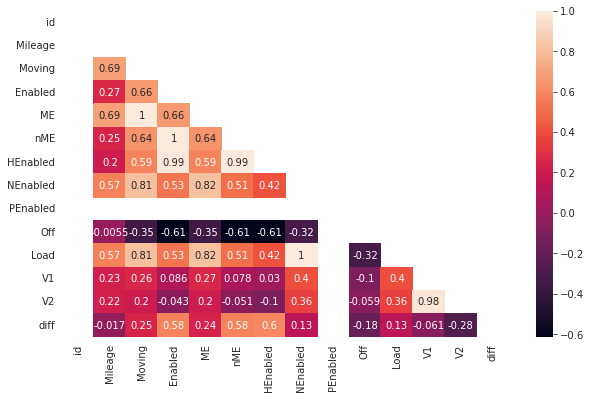

In [ ]:
mask = np.zeros_like(dcheck.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]= True
from numpy.ma.core import mask_or
plt.figure(figsize=(10,6))
sns.heatmap(dcheck.corr(), annot=True, annot_kws={'size':10}, mask=mask)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
from sklearn.model_selection import train_test_split
key = dcheck['diff']
features =  dcheck.drop(['diff','V1','V2'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, key, test_size = 0.05, random_state=10)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(22, 11)
(22,)
(2, 11)
(2,)


Без логарифмирования

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Коэффициент детерминации тренировочных данных: ',regr.score(X_train, y_train))
print('Коэффициент детерминации тестовых данных: ',regr.score(X_test, y_test))
print('Точка пересечения с осью ординат: ', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Коэффициент детерминации тренировочных данных:  0.5734187171555258
Коэффициент детерминации тестовых данных:  -0.5620596917127658
Точка пересечения с осью ординат:  -25.97453308120032


,coef
id,0.000000e+00
Mileage,-7.697845e-01
Moving,9.925505e-01
Enabled,-2.312588e-01
ME,-6.185767e-01
nME,3.873179e-01
HEnabled,-1.541194e-01
NEnabled,-7.713938e-02
PEnabled,8.968310e-44
Off,4.788478e-04


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
variance_inflation_factor(exog = X_pvalue.values, exog_idx = 1) 

1.8839178172218571

In [ ]:
dfirst['diff'] = dfirst['V1'] - dfirst['V2']
features = dfirst.drop(['V2','V1','diff', 'Date'], axis=1)
predictions = []
i = 0
for index, row in features.iterrows():
  pred = regr.predict(np.array([row]))
  #print(dcheck['diff'][i])
  predictions.append(pred)
  i += 1

In [ ]:
#print(predictions)
dfirst['pdiff'] = list(map(lambda x: x[0], predictions))
print(dfirst[['diff', 'pdiff']])

      diff      pdiff
0     18.4  15.940767
1     48.9  43.455051
2     27.1  26.424482
3     40.1  43.576800
4     46.5  35.740435
...    ...        ...
1297   NaN -15.172312
1298   NaN  -7.182152
1299   NaN   9.668980
1300   NaN   7.463407
1301   NaN  15.369184

[1302 rows x 2 columns]


In [ ]:
dfirst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1302 non-null   int64  
 1   Date      1302 non-null   object 
 2   Mileage   1302 non-null   float64
 3   Moving    1302 non-null   int64  
 4   Enabled   1302 non-null   int64  
 5   ME        1302 non-null   int64  
 6   nME       1302 non-null   int64  
 7   HEnabled  1302 non-null   int64  
 8   NEnabled  1302 non-null   int64  
 9   PEnabled  1302 non-null   int64  
 10  Off       1302 non-null   int64  
 11  Load      1302 non-null   int64  
 12  V1        31 non-null     float64
 13  V2        31 non-null     float64
 14  diff      31 non-null     float64
 15  pdiff     1302 non-null   float64
dtypes: float64(5), int64(10), object(1)
memory usage: 162.9+ KB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

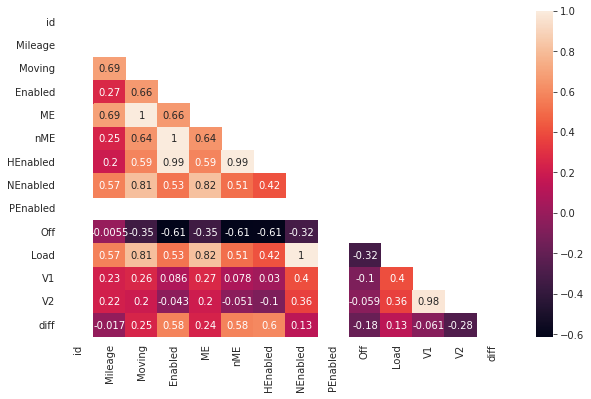

In [ ]:
mask = np.zeros_like(dcheck.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]= True
from numpy.ma.core import mask_or
plt.figure(figsize=(10,6))
sns.heatmap(dcheck.corr(), annot=True, annot_kws={'size':10}, mask=mask)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [ ]:
dfirst.head(5)

,id,Date,Mileage,Moving,Enabled,ME,nME,HEnabled,NEnabled,PEnabled,Off,Load,V1,V2,diff,pdiff
0,734,01.12.2021,1.21,297,4091,297,3794,711,3380,0,82309,3380,315.4,297.0,18.4,15.940767
1,734,02.12.2021,1.04,207,20974,206,20768,20821,153,0,65426,153,294.3,245.4,48.9,43.455051
2,734,03.12.2021,1.72,252,10918,252,10666,9440,1478,0,75482,1478,244.9,217.8,27.1,26.424482
3,734,04.12.2021,0.43,629,25283,629,24654,25097,186,0,61117,186,217.0,176.9,40.1,43.576800
4,734,05.12.2021,1.23,314,9202,302,8900,8992,210,0,77198,210,174.1,127.6,46.5,35.740435


In [ ]:
grouped = dfirst.groupby('id')['pdiff'].max()
print(grouped)

id
106       14.585789
113       39.539740
123      152.612702
133       21.796276
154     1622.829453
155      115.034850
158       12.805912
230       15.104860
242       21.567235
298       13.600320
341    20015.933228
410       90.402987
411      126.719377
471       14.503427
578       14.012608
585    20082.692391
606       13.664486
612    33430.343198
638       28.776372
661    20004.847509
671    33433.237780
681       86.100211
712       15.369184
728       15.185785
734       57.095763
740       15.710129
757       15.120183
783       15.369663
786       13.348925
788    19565.182064
805       14.635589
837       13.769353
877       12.881091
885       15.369184
891    28268.813223
915       14.436867
916       15.147477
928       13.312054
930      129.261073
939       31.113221
969       12.282531
982       13.875179
Name: pdiff, dtype: float64
